In [1]:
from pnm_sim_old import Pnm_sim
import matplotlib.pyplot as plt
import numpy as np

sample_image = np.load('sample_blobs/binary_3d.npy')

print(sample_image.shape)



(80, 80, 80)


In [ ]:
data_pnm = Pnm_sim(im=sample_image,voxel_size=1e-06)
data_pnm.network_extract()
if data_pnm.error == 1:
    print('Error in network extraction')
    


------------------------------------------------------------
Beginning SNOW Algorithm
Converting supplied image (im) to boolean
Peforming Distance Transform
Applying Gaussian blur with sigma = 0.4
Initial number of peaks:  452
Peaks after trimming saddle points:  40
Peaks after trimming nearby peaks:  40
------------------------------------------------------------
Extracting pore and throat information from image
100%|██████████| 118/118 [00:00<00:00, 282.67it/s]


In [ ]:
data_pnm.init_physics()
data_pnm.get_absolute_perm()



In [8]:
# print out porosity, permeability and euler number
print(f'porosity: {data_pnm.data_tmp["porosity"]}')
print(f'permeability: {data_pnm.data_tmp["kabs"]}')
print(f'euler number: {data_pnm.data_tmp["euler"]}')

porosity: 0.499431640625
permeability: 88.15566091623317
euler number: -538


#### Two phase flow simulation

In [9]:
data_pnm.invasion_percolation()
data_pnm.kr_simulation()

------------------------------------------------------------
SOURCE     : openpnm.algorithms.OrdinaryPercolation.get_intrusion_data 
TIME STAMP : 2025-03-13 14:17:57,102
------------------------------------------------------------
------------------------------------------------------------
SOURCE     : openpnm.algorithms.OrdinaryPercolation.get_intrusion_data 
TIME STAMP : 2025-03-13 14:17:57,105
------------------------------------------------------------
------------------------------------------------------------
SOURCE     : openpnm.algorithms.OrdinaryPercolation.get_intrusion_data 
TIME STAMP : 2025-03-13 14:17:57,165
------------------------------------------------------------


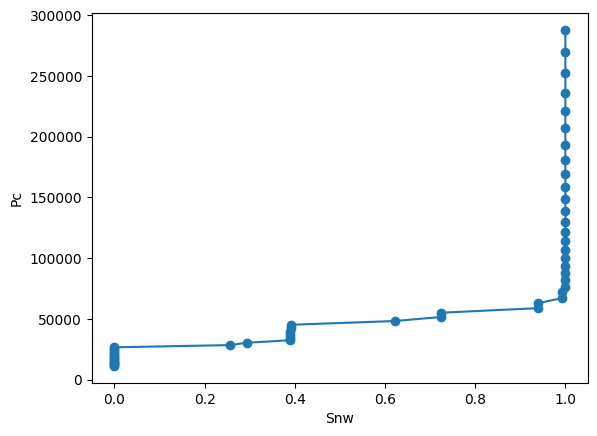

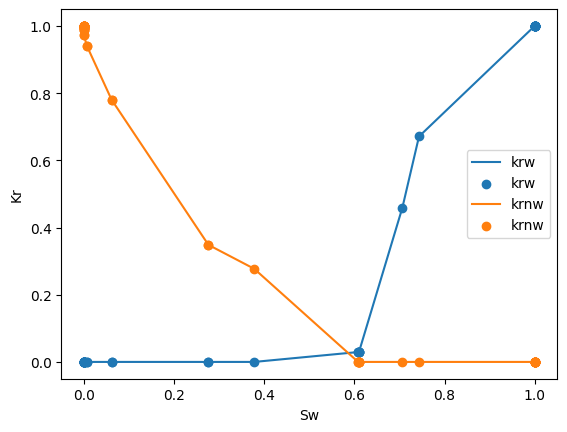

In [24]:
snw = data_pnm.data_tmp['snw']
sw = data_pnm.data_tmp['sw']
pc = data_pnm.data_tmp['pc']
krw = data_pnm.data_tmp['kr_water']
krnw = data_pnm.data_tmp['kr_air']

# plot pc curve
f = plt.figure()
plt.scatter(pc['Snwp'],pc['pc'])
plt.plot(pc['Snwp'],pc['pc'])
plt.xlabel('Snw')
plt.ylabel('Pc')
plt.show()

# plot kr curve
# make sure data points are also plotted
f = plt.figure()

plt.plot(sw,krw,label='krw')
plt.scatter(sw,krw,label='krw')
plt.plot(sw,krnw,label='krnw')
plt.scatter(sw,krnw,label='krnw')
plt.xlabel('Sw')
plt.ylabel('Kr')
plt.legend()
plt.show()

